<a href="https://colab.research.google.com/github/mdpw/msc-ai-cw/blob/main/full_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# 1. Load the dataset
file_path = "../dataset/processed/cinnamon_quality_dataset.csv"  # Use raw content URL
df = pd.read_csv(file_path)

In [43]:
# 2. Basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (1230, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Moisture            1230 non-null   float64
 1   Ash                 1230 non-null   float64
 2   Volatile_Oil        1230 non-null   float64
 3   Acid_Insoluble_Ash  1230 non-null   float64
 4   Chromium            1230 non-null   float64
 5   Coumarin            1230 non-null   float64
 6   Quality_Label       1230 non-null   object 
dtypes: float64(6), object(1)
memory usage: 67.4+ KB
None

First 5 rows:
    Moisture       Ash  Volatile_Oil  Acid_Insoluble_Ash  Chromium  Coumarin  \
0  11.088430  6.367103      2.144476            0.460706  0.232420  0.009068   
1  12.124504  5.248380      1.040705            0.843331  0.627441  0.275516   
2  10.340937  6.622376      1.304324            0.552900  0.049058 -0.131711   
3  12.583305  5.5753

In [44]:
# 3. Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Moisture          Ash  Volatile_Oil  Acid_Insoluble_Ash  \
count  1230.000000  1230.000000   1230.000000         1230.000000   
mean     12.103624     6.588009      1.070298            0.463759   
std       1.329980     0.542055      0.403535            0.377651   
min       9.422530     4.847246     -0.202708           -0.802763   
25%      11.052510     6.169311      0.792477            0.211263   
50%      11.724905     6.594756      1.085737            0.448362   
75%      13.195556     6.994653      1.362810            0.713082   
max      15.602336     7.972483      2.255908            2.178398   

          Chromium     Coumarin  
count  1230.000000  1230.000000  
mean      0.007343     0.020963  
std       0.321038     0.325130  
min      -1.008664    -1.012603  
25%      -0.212172    -0.201090  
50%       0.010491     0.025202  
75%       0.224426     0.249319  
max       1.074061     0.926268  


In [45]:
# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Moisture              0
Ash                   0
Volatile_Oil          0
Acid_Insoluble_Ash    0
Chromium              0
Coumarin              0
Quality_Label         0
dtype: int64


In [46]:
# Remove text after first space in column names
df.columns = [col.split(' ')[0] for col in df.columns]


Target Distribution:
Quality_Label
High      410
Low       410
Medium    410
Name: count, dtype: int64


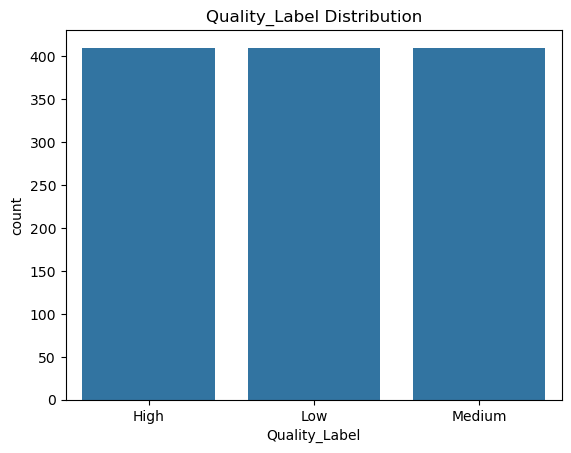

In [47]:
# 5. Class distribution (Quality_Label)
print("\nTarget Distribution:")
print(df['Quality_Label'].value_counts())
sns.countplot(x='Quality_Label', data=df)
plt.title('Quality_Label Distribution')
plt.show()

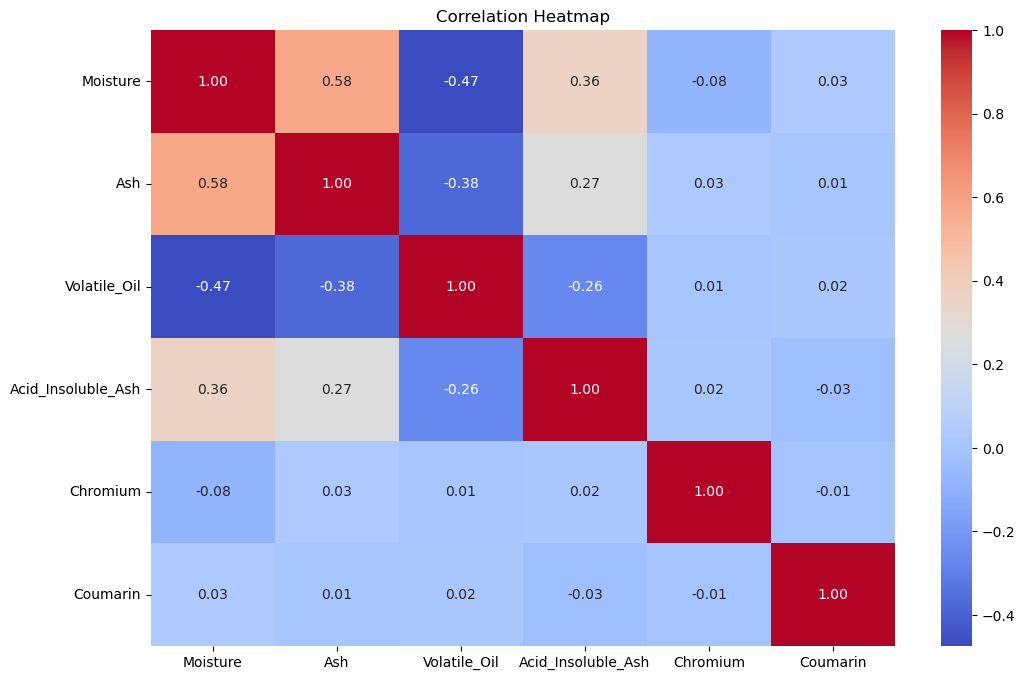

In [48]:
# 6. Correlation Matrix (Numerical Features Only)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

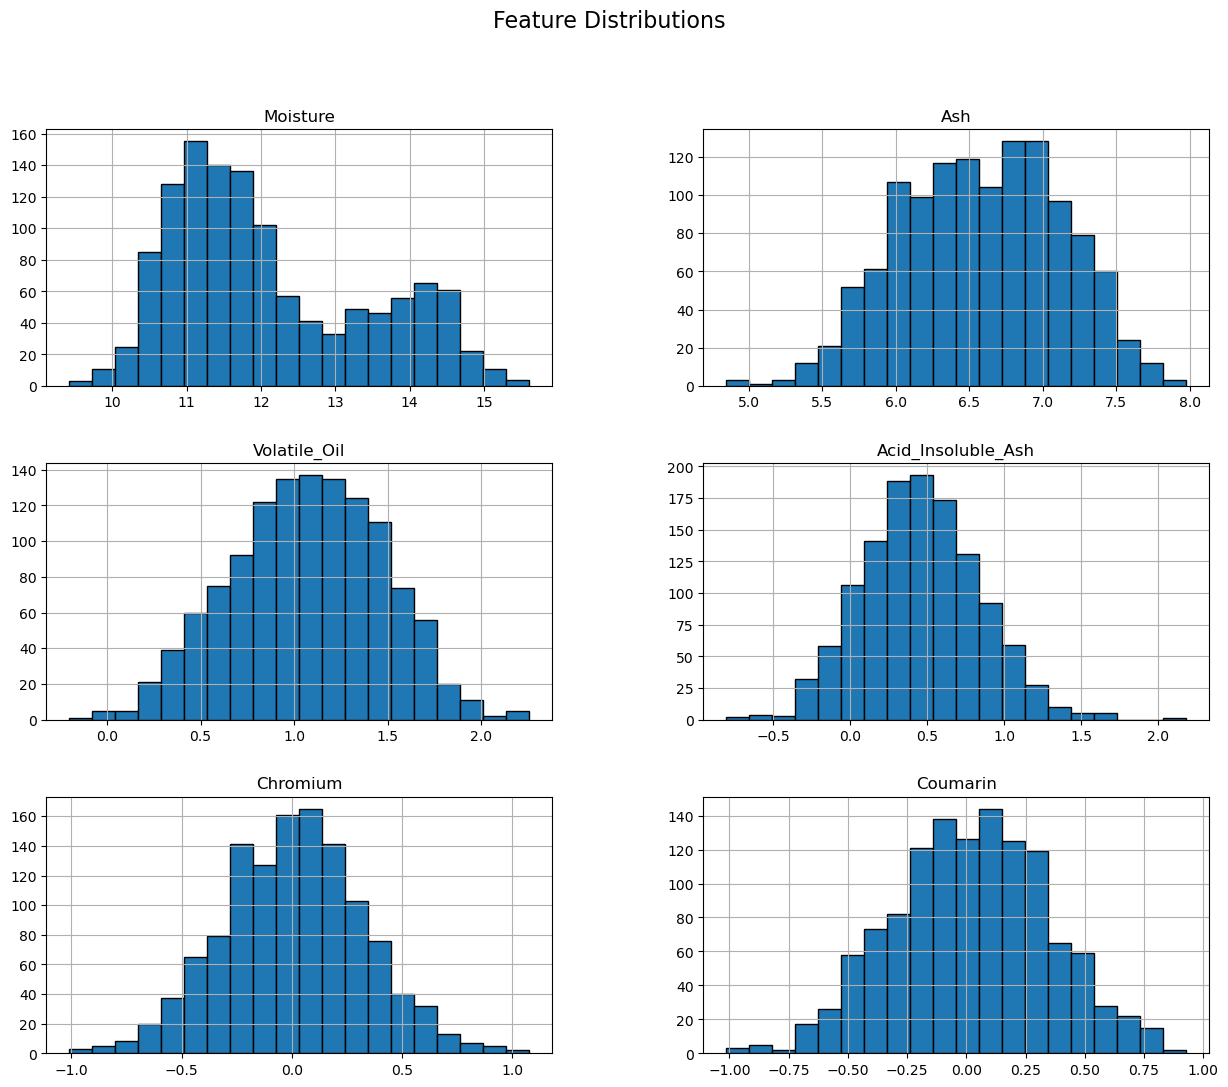

In [49]:
# 7. Distribution of each numerical feature
numeric_cols = numeric_df.columns
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

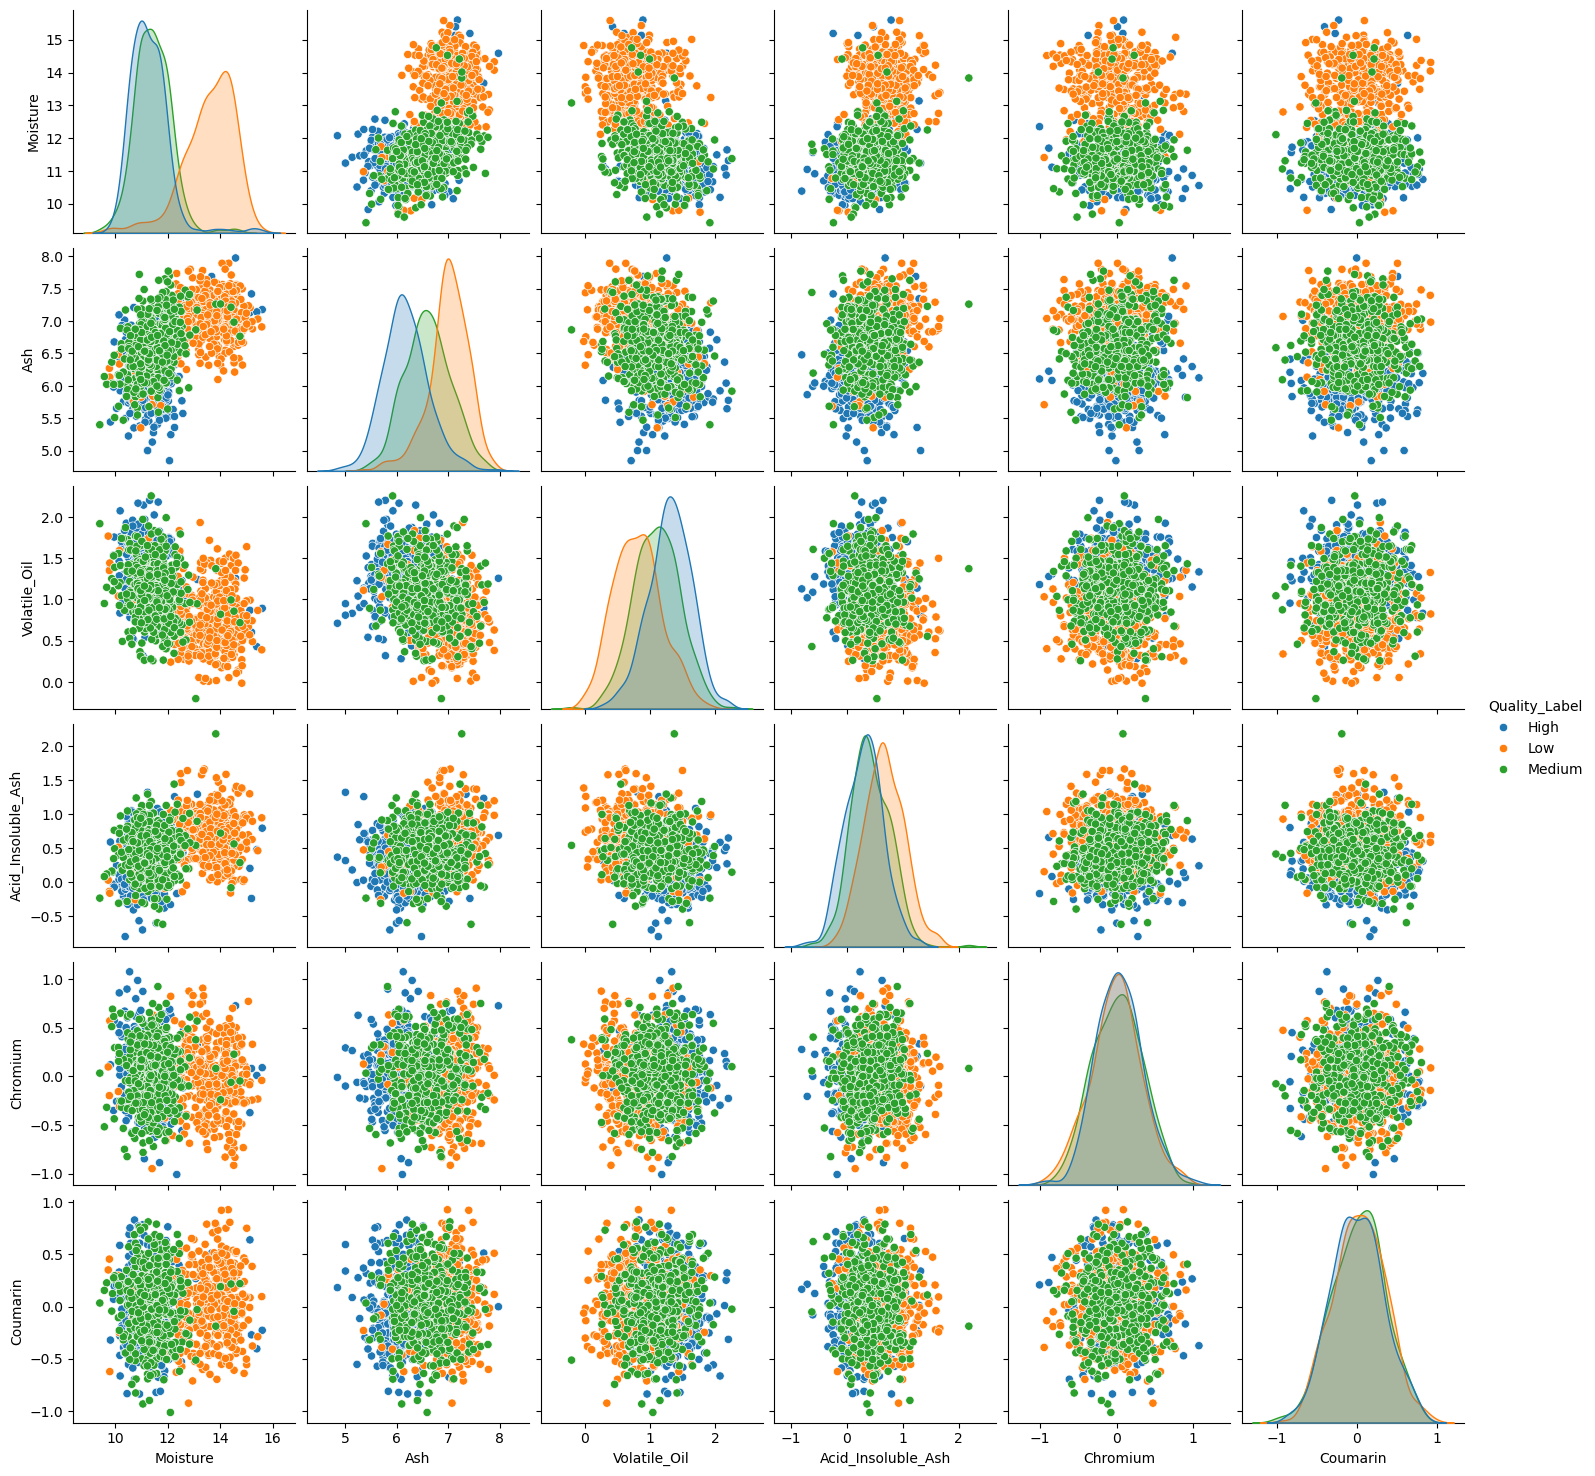

In [50]:
sns.pairplot(data=df,hue='Quality_Label')

In [51]:
df.to_csv('../dataset/processed/modified_cinnamon_quality_dataset.csv', index=False)